In [1]:
import numpy as np
import astropy.constants as const
import astropy.io.ascii as asci

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
fs = 10
matplotlib.rcParams['font.size']=fs
ms = 6
matplotlib.rcParams['lines.markersize']=ms

tmax = 59321
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)
z = 0.018
d_kpc = cosmo.luminosity_distance([z])[0].value * 1e+3
d_cm = d_kpc * 1e+3 * const.pc.cgs.value
scale = 4 * np.pi * d_cm**2 

In [2]:
def plot_HID2(ax, tb, dophase = "A"):
    colormap = plt.cm.plasma
    colorA = "silver"
    colorB = "silver"
    colorC = "silver"
    colorD = "silver"
    colorE = "silver"
    alpha = 1
    if dophase=="A":
        colorA = colormap(0.9)
        tcolor = colorA 
        marker = "o"
        myms = ms
    if dophase=="B":
        colorB = colormap(0.7)
        tcolor = colorB
        marker = "*"
        myms = ms+3
    if dophase=="C":
        colorC = colormap(0.5)
        tcolor = colorC
        marker = "d"
        myms = ms +1
        alpha = 0.8
    if dophase=="D":
        colorD = colormap(0.3)
        tcolor = colorD
        marker = "s"
        myms = ms+0.5
        alpha = 0.8
    if dophase=="E":
        colorE = colormap(0.1)
        tcolor = colorE
        marker = "P"
        myms = ms+2
    ix = tb["phase"] == dophase
    subtb = tb[ix]
        
    y = np.log10(subtb["L0"])
    yerr = subtb["L0_unc"] / subtb["L0"] / np.log(10)
    ax.errorbar(subtb["HR"], y, yerr = yerr,
                xerr = subtb["HR_unc"], fmt  = marker, color = tcolor,
                linewidth = 0.8, zorder = 2, markersize = myms,
                markeredgecolor = "k", markeredgewidth = 0.2, alpha = alpha,
                label = dophase)  

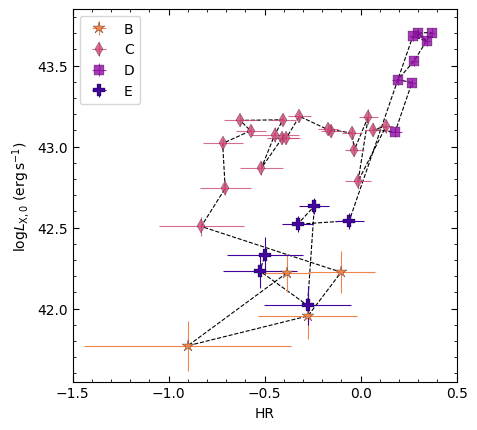

In [3]:
    filename = "../data/xrt/swift_summary.dat"
    tb = asci.read(filename)
    
    xs = (tb["mjd"] - tmax)/(1+z)
    tb["x"] = xs
    
    tb["phase"] = "A"
    tb["phase"][xs>0] = "B"
    tb["phase"][xs>100] = "C"
    tb["phase"][xs>225] = "D"
    tb["phase"][xs>270] = "E"
    
    plt.figure(figsize = (4.6, 4.2))
    ax = plt.subplot(111)
    ax.plot(tb["HR"][4:], np.log10(tb["L0"][4:]), linestyle= "--", color = "k",
            linewidth = 0.8, zorder = 1)
    plot_HID2(ax, tb, dophase = "B")
    plot_HID2(ax, tb, dophase = "C")
    plot_HID2(ax, tb, dophase = "D")
    plot_HID2(ax, tb, dophase = "E")
    
    ax.tick_params(which = 'major', length = 4, direction = "in", top=True, right = True)
    ax.tick_params(which = 'minor', length = 2, direction = "in", top=True, right = True)
    
    xmax = 0.5
    xmin = -1.5
    ax.set_xlim(xmin, xmax)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.set_ylabel("log"+r"$L_{\rm X, 0}$"+" ("+r"$\rm erg\,s^{-1}$"+")")
    
    ymin = 41.55
    ymax = 43.85
    ax.set_ylim(ymin, ymax)
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.set_xlabel("HR")
    
    ax.legend()
    
    plt.tight_layout(rect = (-0.03, -0.03, 1.03, 1.02))